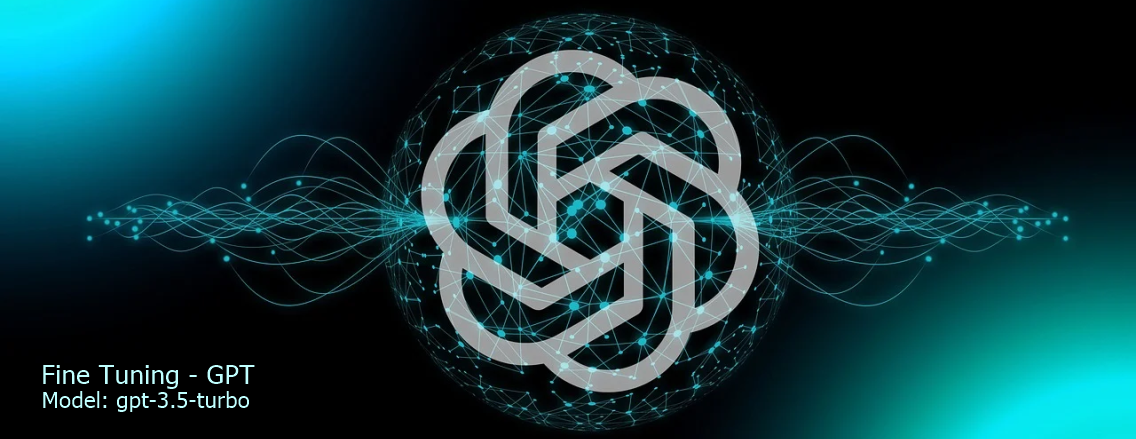

 A executação "pip install openai", está basicamente usando o gerenciador de pacotes pip do Python para baixar e instalar a biblioteca OpenAI. Essa biblioteca permite que você acesse as funcionalidades oferecidas pela plataforma OpenAI, como modelos de linguagem de inteligência artificial, APIs de processamento de linguagem natural, entre outros recursos!!

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


Carga e Preparação dos Dados

In [ ]:
# módulo tiktoken
!pip install tiktoken
import json
import tiktoken # para contagem de tokens
import numpy as np
from collections import defaultdict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00


In [ ]:
#Carregamento de dados
data_path = "/content/drive/MyDrive/Colab Notebooks/FineTunning/FineTuningContal_prepared.jsonl"

In [ ]:
# Leitura dos dados
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Estatísticas iniciais do dataset
print("Numero de Prompts:", len(dataset))
print("Primeiro Prompt:")

# Impressão das mensagens em uma única linha
for message in dataset[0]["prompt"]:
    print(message, end='')

Numero de Prompts: 108
Primeiro Prompt:
Como posso calcular meu imposto de renda?

Preparação e análise para Ajuste Fino. Com base no script: https://cookbook.openai.com/examples/chat_finetuning_data_prep

In [ ]:
#Escolha do modelo de tokenização. Para o formato par prompt/completion
encoder = tiktoken.encoding_for_model("davinci-002")

In [ ]:
#Carga do arquivo para tokenização:
with open("/content/drive/MyDrive/Colab Notebooks/FineTunning/FineTuningContal_prepared.jsonl", "rb") as file:
    data = file.read()

In [ ]:
# Supondo que 'data' seja um objeto do tipo bytes
data_str = data.decode('utf-8')  # Converte bytes para string usando a codificação utf-8

# Agora, você pode passar 'data_str' para a função 'encode'
tokens = encoder.encode(data_str)

In [ ]:
# Contagem de tokens
num_tokens = len(tokens)
print(f"Número de Tokens: {num_tokens}")

# Exemplo de decodificação dos tokens de volta para texto. Descomentar as duas ultimas linhas, caso queira imprimir o dic
decoded_text = encoder.decode(tokens)
print(decoded_text)

Número de Tokens: 7960
{"prompt":"Como posso calcular meu imposto de renda?","completion":" Você pode calcular seu imposto de renda utilizando uma calculadora de imposto online ou consultando um contador para assistência profissional."}
{"prompt":"Como posso calcular meu imposto de renda?","completion":" O cálculo do imposto de renda depende de uma série de fatores, incluindo sua renda bruta, deduções fiscais e despesas elegíveis."}
{"prompt":"Qual é a diferença entre um contador e um contador público?","completion":" Um contador geralmente lida com a preparação de registros financeiros internos de uma empresa, enquanto um contador público é licenciado para fornecer serviços de contabilidade para o público em geral."}
{"prompt":"Qual é a diferença entre um contador e um contador público?","completion":" A principal diferença está na licença: um contador público é certificado pelo estado para fornecer serviços contábeis, incluindo auditorias e preparação de declarações fiscais."}
{"prom

In [ ]:
# Tokenização do prompt
tokens = encoder.encode(decoded_text)

#Impressão dos tokens
print(tokens)

# Decodificação dos tokens de volta para texto
#decoded_text = encoder.decode(tokens)
#print(decoded_text)

[5018, 41681, 3332, 66001, 1153, 708, 97627, 56309, 82509, 78, 409, 17634, 64, 30, 2247, 44412, 3332, 81897, 29294, 97627, 20607, 82509, 78, 409, 17634, 64, 77090, 10832, 5935, 30913, 409, 82509, 78, 2930, 6033, 8666, 4988, 4543, 59668, 3429, 7945, 24625, 2848, 90680, 1210, 534, 5018, 41681, 3332, 66001, 1153, 708, 97627, 56309, 82509, 78, 409, 17634, 64, 30, 2247, 44412, 3332, 507, 272, 19540, 64487, 656, 82509, 78, 409, 17634, 64, 6904, 68, 409, 10832, 47528, 409, 282, 4428, 417, 11, 18916, 84, 36099, 19906, 17634, 64, 1437, 16382, 11, 7836, 84, 15607, 42723, 936, 285, 384, 951, 20975, 300, 18190, 75707, 1210, 534, 5018, 41681, 3332, 32129, 4046, 264, 1422, 17848, 17930, 9465, 4543, 59668, 384, 4543, 59668, 60050, 30, 2247, 44412, 3332, 24218, 59668, 98992, 12826, 326, 4849, 470, 264, 10073, 13264, 409, 64627, 17452, 48328, 2655, 437, 409, 10832, 33864, 11, 95741, 4543, 59668, 60050, 4046, 12553, 46357, 2172, 3429, 57109, 94218, 94843, 409, 687, 81016, 3429, 297, 60050, 991, 98992, 1

Estimativa de Custo

In [ ]:
# Caminho para o dataset
data_custo = "/content/drive/MyDrive/Colab Notebooks/FineTunning/FineTuningContal_prepared.jsonl"

# Carrega o dataset
with open(data_custo, 'r', encoding='utf-8') as file:
    dataset = [json.loads(line) for line in file]

# Função para calcular o número de tokens em um texto
def calculate_tokens(text):
    return len(text.split())

# Constantes (podem ser alteradas)
MAX_TOKENS_PER_EXAMPLE = 4096
#Verificar quantidade de epocas:
TARGET_EPOCHS = 3
MIN_TARGET_EXAMPLES = 100
MAX_TARGET_EXAMPLES = 25000
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

# Calcula o número de tokens por exemplo
example_lens = [calculate_tokens(example['prompt']) + calculate_tokens(example['completion']) for example in dataset]

# Determina o número de épocas
n_epochs = TARGET_EPOCHS
n_train_examples = len(dataset)

if n_train_examples * TARGET_EPOCHS < MIN_TARGET_EXAMPLES:
    n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples)
elif n_train_examples * TARGET_EPOCHS > MAX_TARGET_EXAMPLES:
    n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples)

# Calcula os tokens faturáveis no dataset
n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in example_lens)

# Imprime os resultados
print(f"O conjunto de dados tem aproximadamente ~{n_billing_tokens_in_dataset} tokens que serão cobrados durante o treinamento")
print(f"Por padrão, você treinará por {n_epochs} épocas neste conjunto de dados")
print(f"Por padrão, você será cobrado por aproximadamente ~{n_epochs * n_billing_tokens_in_dataset} tokens")

O conjunto de dados tem aproximadamente ~4371 tokens que serão cobrados durante o treinamento
Por padrão, você treinará por 3 épocas neste conjunto de dados
Por padrão, você será cobrado por aproximadamente ~13113 tokens


Carga do arquivo de treinamento

In [ ]:
#O módulo openai é uma interface Python para interagir com os serviços oferecidos pela plataforma OpenAI.
#Definição da variável api_key, que armazena a chave de API necessária para autenticar e autorizar o acesso aos serviços da OpenAI.
#O objeto client é utilizado para fazer chamadas aos serviços da OpenAI, como enviar solicitações para gerar texto com base em modelos de linguagem de inteligência artificial.
from openai import OpenAI

api_key = 'sk'
client = OpenAI(api_key=api_key)

**Configuração de chave:**
Configurar a chave de API dessa maneira permite que você acesse a chave de API de forma segura em seu código sem expô-la diretamente no código-fonte. Isso é especialmente útil quando você precisa compartilhar o código com outros ou quando o código é armazenado em um repositório público, pois evita expor a chave de API publicamente. Além disso, usar variáveis de ambiente pode facilitar a configuração em diferentes ambientes, como desenvolvimento, teste e produção.

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'sk'

In [ ]:
#Carregar dados usando a API Files para ser usado em trabalhos de ajuste fino

client.files.create(
  file=open("/content/drive/MyDrive/Colab Notebooks/FineTunning/FineTuningContal_prepared.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-GSDSvYgKi93cAG34Ax57oVY1', bytes=31110, created_at=1718048739, filename='FineTuningContal_prepared.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [ ]:
#Modelo ajustado
#Retorno do ID do arquivo quando o arquivo de treinamento for carregado na API OpenAI
client.fine_tuning.jobs.create(
  training_file='file-fjxi0wrbANusHlZmAoq0TdxZ',
  model="davinci-002"
)

FineTuningJob(id='ftjob-fyXKEy6xR2M0wxCxl8vetzje', created_at=1718048745, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='davinci-002', object='fine_tuning.job', organization_id='org-ueG8ZZknadeJPgMEs1pbBfAR', result_files=[], seed=857649450, status='validating_files', trained_tokens=None, training_file='file-fjxi0wrbANusHlZmAoq0TdxZ', validation_file=None, estimated_finish=None, integrations=[], user_provided_suffix=None)

In [ ]:
#Após criação do modelo,
#Ajuste do modelo no Playground 'completions'
  #Interação com o max tokens (200) e temperatura (0.8)
  #Ajuste do modelo com

#Para um primeiro teste, você pode usar parâmetros intermediários para ter uma noção geral do comportamento do modelo:
#Temperatura: 0.7
#Max Tokens: 200
